In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint

In [2]:
csv_data = "../ETL/miami_df_final.csv"
miami_df = pd.read_csv(csv_data)

In [3]:
cols = ["neighborhood", "br", "ba", "sqft", "housingType", "laundry", "parking", "cats", "dogs",\
       "furnished", "rent"]
miami_df = miami_df[cols].copy()
miami_df

,neighborhood,br,ba,sqft,housingType,laundry,parking,cats,dogs,furnished,rent
0,Dadeland,2,2.0,NaN,apartment,w/d in unit,carport,no,no,no,1900
1,Doral,2,2.0,NaN,apartment,w/d in unit,attached garage,no,no,no,2557
2,Miami,2,2.0,1106.0,apartment,w/d in unit,off-street parking,yes,yes,no,2241
3,Doral,3,2.0,NaN,apartment,w/d in unit,attached garage,no,no,no,3399
4,Doral,1,1.0,NaN,apartment,w/d in unit,attached garage,no,no,no,1978
...,...,...,...,...,...,...,...,...,...,...,...
1831,Miami,1,1.0,NaN,apartment,w/d in unit,carport,no,no,no,1950
1832,Miami Beach,2,2.0,1300.0,apartment,w/d in unit,carport,no,no,no,2500
1833,Kendall,2,2.0,NaN,apartment,w/d in unit,carport,no,no,no,1500
1834,Fontainebleau,2,2.5,NaN,apartment,w/d in unit,carport,no,no,no,1700


In [4]:
miami_df.describe()

,br,ba,sqft,rent
count,1836.000000,1833.000000,616.000000,1836.000000
mean,1.735294,1.695035,1021.472403,2016.338235
std,0.774721,0.550915,413.481218,799.370174
min,0.000000,1.000000,235.000000,500.000000
25%,1.000000,1.000000,741.500000,1500.000000
50%,2.000000,2.000000,950.000000,1800.000000
75%,2.000000,2.000000,1250.000000,2250.000000
max,5.000000,4.500000,2921.000000,4950.000000


In [5]:
# replace NaN in miami_df['ba']
miami_df['ba'] = miami_df['ba'].apply(str)
miami_df.loc[miami_df['ba'].str.contains('nan'), 'ba'] = "0"
miami_df['ba'] = pd.to_numeric(miami_df['ba'])

In [6]:
# replace Nan values in miami_df['sqft']
miami_df['sqft'] = miami_df['sqft'].apply(str)
filt = miami_df[miami_df['sqft'].str.contains('nan')]
miami_df.drop(index = filt.index, inplace = True)

miami_df['sqft'] = pd.to_numeric(miami_df['sqft'])

miami_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 2 to 1832
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  616 non-null    object 
 1   br            616 non-null    int64  
 2   ba            616 non-null    float64
 3   sqft          616 non-null    float64
 4   housingType   616 non-null    object 
 5   laundry       616 non-null    object 
 6   parking       616 non-null    object 
 7   cats          616 non-null    object 
 8   dogs          616 non-null    object 
 9   furnished     616 non-null    object 
 10  rent          616 non-null    int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 57.8+ KB


In [7]:
miami_df = miami_df.reset_index(drop=True)

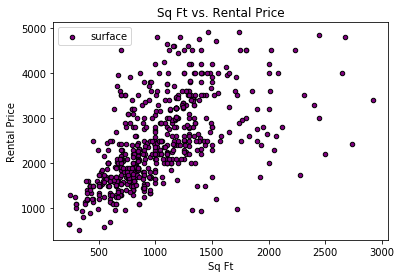

In [8]:
plt.figure()
plt.scatter(miami_df['sqft'],miami_df['rent'], s=20, edgecolor="black",c="purple", label="surface")
plt.xlabel("Sq Ft")
plt.ylabel("Rental Price")
plt.title("Sq Ft vs. Rental Price")
plt.legend()
plt.show()

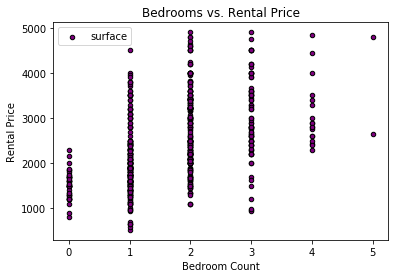

In [9]:
plt.figure()
plt.scatter(miami_df['br'],miami_df['rent'], s=20, edgecolor="black",c="purple", label="surface")
plt.xlabel("Bedroom Count")
plt.ylabel("Rental Price")
plt.title("Bedrooms vs. Rental Price")
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.scatter(miami_df['neighborhood'],miami_df['rent'], s=20, edgecolor="black",c="purple", label="Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Rental Price")
plt.title("Neighborhood vs. Rental Price")
plt.legend()
plt.show()

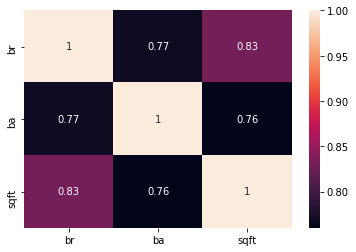

In [10]:
import seaborn as sn
## keep only numerical columns
X = (miami_df[["neighborhood", "br", "ba", "sqft", "laundry", "parking", "cats", "dogs", "furnished"]])
## correlation matrix
corrMatrix = X.corr()
## visualize it in a heatmap
sn.heatmap(corrMatrix, annot=True)
plt.show()

## Data Preprocessing
Binary Encoded data, Scale or Normalize data

In [11]:
X = pd.get_dummies(miami_df[["neighborhood", "br", "ba", "sqft", "laundry", "parking", "cats", "dogs", "furnished"]])
y = miami_df["rent"].values.reshape(-1, 1)
print(X.shape, y.shape)
X

(616, 58) (616, 1)


,br,ba,sqft,neighborhood_Allapattah,neighborhood_Aventura,neighborhood_Beverly Terrace,neighborhood_Boca Raton,neighborhood_Brickell,neighborhood_Brownsville,neighborhood_Coconut Grove,...,parking_no parking,parking_off-street parking,parking_street parking,parking_valet parking,cats_no,cats_yes,dogs_no,dogs_yes,furnished_no,furnished_yes
0,2,2.0,1106.0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
1,1,1.0,600.0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,1,0
2,3,3.0,1553.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,2,2.0,1190.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
4,2,2.0,1180.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,1,1.5,900.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
612,3,2.0,2000.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
613,2,2.0,848.0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
614,2,2.0,848.0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0


In [12]:
# most accepted rule of thumb is that we should have at least 5 training data points for every feature in our dataset
training_data_set = 616*0.8
ration = training_data_set/21
ration

23.46666666666667

In [13]:
target = np.array(miami_df['rent'])
features = X
feature_list = list(features.columns)
features = np.array(features)

## RANDOM FOREST - KFOLD AND MODEL 


from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
    
kf = KFold(n_splits=10,random_state=42,shuffle=True)
accuracies = []
mse_ = []
r2_ = []

for train_index, test_index in kf.split(features):

    data_train   = features[train_index]
    target_train = target[train_index]

    data_test    = features[test_index]
    target_test  = target[test_index]

    rf = RandomForestRegressor(n_estimators = 1000, 
                               random_state = 42, 
                               criterion = 'mse',
                               bootstrap=True)
    
    rf.fit(data_train, target_train)

    predictions = rf.predict(data_test)

    errors = abs(predictions - target_test)

    print('Mean Absolute Error:', round(np.mean(errors), 2))
    
    mape = 100 * (errors / target_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%')
    
    MSE = mean_squared_error(target_test, predictions)
    r2 = rf.score(data_test, target_test)
    print(f'MSE: {round(MSE, 2)}')
    print(f'R2: {round(r2, 2)}')
    print('------------------')

    accuracies.append(accuracy)
    mse_.append(MSE)
    r2_.append(r2)

average_accuracy = np.mean(accuracies)
average_mse = np.mean(mse_)
average_r2 = np.mean(r2_)
print('Average accuracy:', average_accuracy)
print('Average MSE:', average_mse)
print('Average R2:', average_r2)

Mean Absolute Error: 415.61
Accuracy: 81.57 %
MSE: 304884.97
R2: 0.61
------------------
Mean Absolute Error: 425.85
Accuracy: 78.62 %
MSE: 413203.29
R2: 0.57
------------------
Mean Absolute Error: 382.0
Accuracy: 86.36 %
MSE: 340054.6
R2: 0.6
------------------
Mean Absolute Error: 284.93
Accuracy: 85.88 %
MSE: 222914.49
R2: 0.66
------------------
Mean Absolute Error: 303.6
Accuracy: 88.04 %
MSE: 170865.08
R2: 0.77
------------------
Mean Absolute Error: 448.22
Accuracy: 80.6 %
MSE: 383728.29
R2: 0.58
------------------
Mean Absolute Error: 355.51
Accuracy: 84.66 %
MSE: 284160.34
R2: 0.7
------------------
Mean Absolute Error: 392.63
Accuracy: 83.49 %
MSE: 412428.18
R2: 0.61
------------------
Mean Absolute Error: 297.85
Accuracy: 88.56 %
MSE: 180948.83
R2: 0.74
------------------
Mean Absolute Error: 309.11
Accuracy: 84.77 %
MSE: 203045.17
R2: 0.71
------------------
Average accuracy: 84.25597370784868
Average MSE: 291623.3245250925
Average R2: 0.6542810988541042


In [14]:
# Hyperparameter Tuning the Random Forest

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [15]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf2 = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf2, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(data_train, target_train)

print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}


In [21]:
# Run model again with new parameters to see if there's an increase in performance metrics

## RANDOM FOREST - KFOLD AND MODEL 

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
    
kf = KFold(n_splits=10,random_state=42,shuffle=True)
accuracies = []
for train_index, test_index in kf.split(features):

    data_train   = features[train_index]
    target_train = target[train_index]

    data_test    = features[test_index]
    target_test  = target[test_index]

    rf2 = RandomForestRegressor(n_estimators = 200, 
                               random_state = 42, 
                               criterion = 'mse',
                               min_samples_leaf = 1,
                               min_samples_split = 2,
                               max_features = 'sqrt',
                               bootstrap = True,
                               max_depth = 50)
    
    rf2.fit(data_train, target_train)

    predictions = rf2.predict(data_test)

    errors = abs(predictions - target_test)

    print('Mean Absolute Error:', round(np.mean(errors), 2))
    
    mape = 100 * (errors / target_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%')
    
    MSE = mean_squared_error(target_test, predictions)
    r2 = rf2.score(data_test, target_test)
    print(f'MSE: {round(MSE, 2)}')
    print(f'R2: {round(r2, 2)}')
    print('------------------')

    accuracies.append(accuracy)
    mse_.append(MSE)
    r2_.append(r2)

average_accuracy = np.mean(accuracies)
average_mse = np.mean(mse_)
average_r2 = np.mean(r2_)
print('Average accuracy:', average_accuracy)
print('Average MSE:', average_mse)
print('Average R2:', average_r2)

Mean Absolute Error: 389.34
Accuracy: 81.58 %
MSE: 259586.65
R2: 0.67
------------------
Mean Absolute Error: 376.6
Accuracy: 81.09 %
MSE: 315825.08
R2: 0.67
------------------
Mean Absolute Error: 357.94
Accuracy: 87.35 %
MSE: 301928.83
R2: 0.65
------------------
Mean Absolute Error: 261.75
Accuracy: 87.16 %
MSE: 206131.3
R2: 0.69
------------------
Mean Absolute Error: 309.52
Accuracy: 87.77 %
MSE: 191328.81
R2: 0.75
------------------
Mean Absolute Error: 452.97
Accuracy: 80.18 %
MSE: 402325.58
R2: 0.56
------------------
Mean Absolute Error: 331.48
Accuracy: 85.67 %
MSE: 236843.27
R2: 0.75
------------------
Mean Absolute Error: 398.69
Accuracy: 82.92 %
MSE: 383003.34
R2: 0.64
------------------
Mean Absolute Error: 283.43
Accuracy: 89.34 %
MSE: 174121.0
R2: 0.75
------------------
Mean Absolute Error: 298.92
Accuracy: 84.73 %
MSE: 192914.75
R2: 0.72
------------------
Average accuracy: 84.77893626321008
Average MSE: 282991.2485319533
Average R2: 0.6630863495664635


In [22]:
preds = rf.predict(data_test)

df = pd.DataFrame({'Predicted': preds, 'Actual': target_test, 'Abs Error': errors})
df

,Predicted,Actual,Abs Error
0,1546.869000,1350,185.615000
1,3251.839000,4850,1681.910000
2,1927.970705,1895,38.849583
3,1786.644042,1800,16.439583
4,3044.070000,3800,713.200000
...,...,...,...
56,2054.031747,1700,215.755833
57,3284.297001,3235,50.231112
58,735.974500,667,93.210000
59,2956.423000,2700,181.265000


In [23]:
preds2 = rf2.predict(data_test)

df2 = pd.DataFrame({'Predicted': preds2, 'Actual': target_test, 'Abs Error': errors})
df2

,Predicted,Actual,Abs Error
0,1535.615000,1350,185.615000
1,3168.090000,4850,1681.910000
2,1856.150417,1895,38.849583
3,1816.439583,1800,16.439583
4,3086.800000,3800,713.200000
...,...,...,...
56,1915.755833,1700,215.755833
57,3285.231112,3235,50.231112
58,760.210000,667,93.210000
59,2881.265000,2700,181.265000


In [24]:
# make predictions

# create a new dataframe that is indexed like the trained model
newdata = pd.DataFrame().reindex_like(X)
newdata = pd.DataFrame(newdata, index=[0])
newdata.fillna(value=0, inplace=True)

# insert information about your apartment 
newdata['br'] = 1
newdata['ba'] = 1
newdata['sqft'] = 660

rf.predict(newdata)

array([1397.71108333])

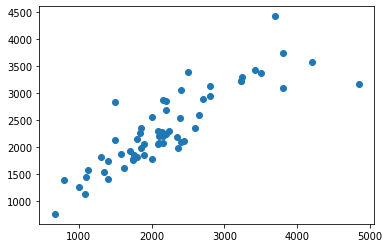

In [25]:
plt.scatter(target_test, predictions)